# Exploracion

##### Integrantes: 
##### - Harold Aquino Curisinche 
##### - Rosa Estrada Estrada
##### Descripción: Exploración inicial de los datos de reclamos de SUSALUD (2021-2024)

### 1. Importacion de Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [30]:
sns.set_style(style="whitegrid")

## Cargar datos procesados

In [5]:
df = pd.read_csv("../data/processed/reclamos_clean.csv", low_memory=False)

In [6]:
df.head()

,ID_PERIODO,DE_TIPO_ADMINISTRADO,DE_TIPO_INSTITUCION,DE_MEDIO_PRESENTACION,CO_UNICO_RECLAMO,DE_MEDIO_RECEPCION,FE_PRESEN_RECLA,DE_SERVICIO,DE_COMPETENCIA,DE_CLASIF_1,...,DE_TIPO_ADMIN_DERIVA,DE_RESULTADO,DE_MOTIVO_CONCL_ANTIC,FE_RESULT_RECL,DE_COMUN_RESULT,FE_NOTIFI_RESULT,AÑO,MES,DURACION_RECLAMO,CATEGORIA_DURACION
0,202101,IAFAS,IAFAS,Físico,20007-352,Libro de Reclamaciones Físico,NaN,-,Si,Negar o demora en otorgar la cobertura en salud,...,-,Infundado,-,NaN,Correo electrónico,NaN,NaN,NaN,NaN,NaN
1,202101,IAFAS,IAFAS,Físico,20007-360,Libro de Reclamaciones Físico,NaN,-,Si,Cobrar indebidamente,...,-,Infundado,-,NaN,Correo electrónico,NaN,NaN,NaN,NaN,NaN
2,202101,IAFAS,IAFAS,Físico,20007-361,Libro de Reclamaciones Físico,NaN,-,Si,Otros relativos a las IAFAS,...,-,Infundado,-,NaN,Correo electrónico,NaN,NaN,NaN,NaN,NaN
3,202101,IAFAS,IAFAS,Físico,20007-364,Libro de Reclamaciones Físico,NaN,-,Si,Otros relativos a las IAFAS,...,-,Infundado,-,NaN,Correo electrónico,NaN,NaN,NaN,NaN,NaN
4,202101,IAFAS,IAFAS,Físico,20007-365,Libro de Reclamaciones Físico,NaN,-,Si,Otros relativos a las IAFAS,...,-,Pendiente,-,NaN,-,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162639 entries, 0 to 162638
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_PERIODO             162639 non-null  int64  
 1   DE_TIPO_ADMINISTRADO   162639 non-null  object 
 2   DE_TIPO_INSTITUCION    162639 non-null  object 
 3   DE_MEDIO_PRESENTACION  162639 non-null  object 
 4   CO_UNICO_RECLAMO       162639 non-null  object 
 5   DE_MEDIO_RECEPCION     162639 non-null  object 
 6   FE_PRESEN_RECLA        0 non-null       float64
 7   DE_SERVICIO            162639 non-null  object 
 8   DE_COMPETENCIA         162639 non-null  object 
 9   DE_CLASIF_1            162639 non-null  object 
 10  DE_CLASIF_2            162639 non-null  object 
 11  DE_CLASIF_3            162639 non-null  object 
 12  DE_ESTADO_RECLAMO      162639 non-null  object 
 13  DE_ETAPA_RECLAMO       162639 non-null  object 
 14  DE_TIPO_ADMIN_DERIVA   162639 non-nu

In [9]:
df.describe()

,ID_PERIODO,FE_PRESEN_RECLA,FE_RESULT_RECL,AÑO,MES,DURACION_RECLAMO,CATEGORIA_DURACION
count,162639.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,202259.912702,NaN,NaN,NaN,NaN,NaN,NaN
std,96.781974,NaN,NaN,NaN,NaN,NaN,NaN
min,202101.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,202204.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,202301.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,202310.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,202406.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Contar valores nulos por columna
missing_values = df.isnull().sum()
missing_values[missing_values > 0]  # Mostrar solo columnas con nulos

FE_PRESEN_RECLA       162639
FE_RESULT_RECL        162639
FE_NOTIFI_RESULT      145499
AÑO                   162639
MES                   162639
DURACION_RECLAMO      162639
CATEGORIA_DURACION    162639
dtype: int64

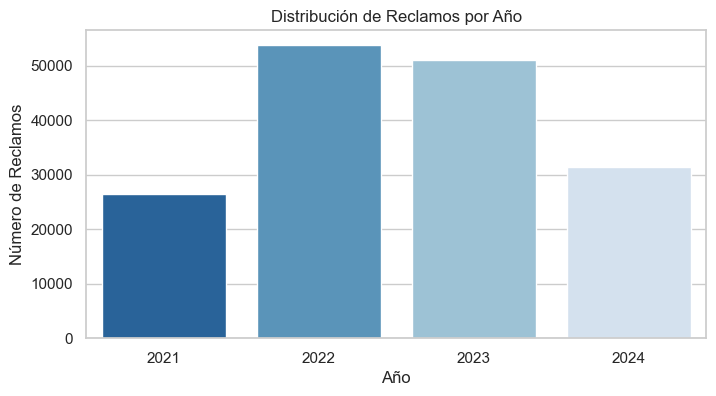

In [53]:
# Contar registros por año
df["ID_PERIODO"] = df["ID_PERIODO"].astype(str)  # Convertir a string para evitar errores
df["AÑO"] = df["ID_PERIODO"].str[:4]  # Extraer el año
reclamos_por_año = df["AÑO"].value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(8, 4))
sns.barplot(
    x=reclamos_por_año.index, 
    y=reclamos_por_año.values,
    hue=reclamos_por_año.index,
    legend=False, 
    palette="Blues_r")
plt.xlabel("Año")
plt.ylabel("Número de Reclamos")
plt.title("Distribución de Reclamos por Año")
plt.show()


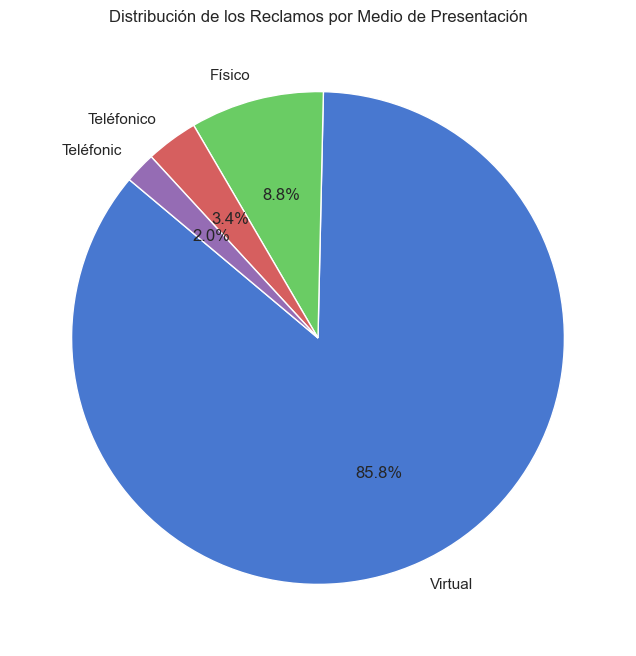

In [52]:
# Contar reclamos por medio de presentación
medio_counts = df["DE_MEDIO_PRESENTACION"].value_counts()

# Gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(
    medio_counts, 
    labels=medio_counts.index, 
    autopct="%1.1f%%", 
    startangle=140, 
    colors=sns.color_palette("muted6"))
plt.title("Distribución de los Reclamos por Medio de Presentación")
plt.show()

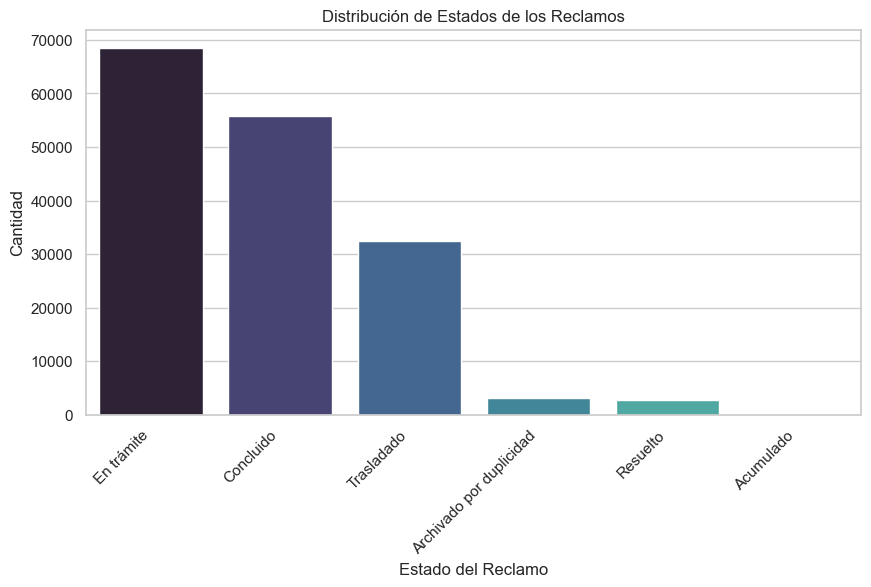

In [64]:
# Contar reclamos por estado
estado_counts = df["DE_ESTADO_RECLAMO"].value_counts()

# Gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(
    x=estado_counts.index, 
    y=estado_counts.values, 
    hue=estado_counts.index,
    legend=False,
    palette="mako")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Estado del Reclamo")
plt.ylabel("Cantidad")
plt.title("Distribución de Estados de los Reclamos")
plt.show()

In [58]:
df["DE_ESTADO_RECLAMO"].unique()

array(['Resuelto', 'Concluido', 'En trámite', 'Trasladado', 'Acumulado',
       'Archivado por duplicidad'], dtype=object)

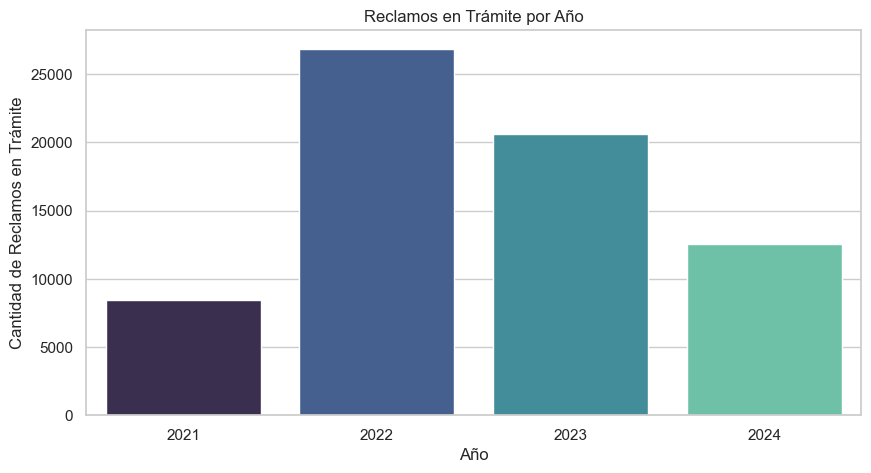

In [63]:
# Filtrar solo reclamos en trámite y agrupar por año
reclamos_tramite = df[df["DE_ESTADO_RECLAMO"] == "En trámite"]
tramite_por_año = reclamos_tramite["AÑO"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(
    x=tramite_por_año.index,
    y=tramite_por_año.values,
    hue=tramite_por_año.index,
    legend=False,
    palette="mako"
)
plt.xticks(rotation=0)
plt.xlabel("Año")
plt.ylabel("Cantidad de Reclamos en Trámite")
plt.title("Reclamos en Trámite por Año")
plt.show()